# Compare Climate Scenarios

### 1. Preliminaries

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import urllib2
import matplotlib.pyplot as plt

In [6]:
import matplotlib
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

### 2. Load the data

We have a function that pulls the data that we chose in the UI directly into the program 
using the container that we're connected to by `docker-compose`

In [7]:
def load_data(unique_id):
    data = pd.read_csv(urllib2.urlopen("http://opennex/dataset/%s/data.csv" % (unique_id)))
    for col in ['Model', 'Scenario', 'Variable']:
        data[col] = data[col].astype('category')
    data['Date'] = data['Date'].astype('datetime64')
    data['Temperature'] = data['Value'] - 273.15
    return data

Replace the argument below with the unique ID of the dataset that you've chosen in the web UI.

In [8]:
data = load_data("Ky3KN")

### 3. Examine the data

In [9]:
data.shape

(538740, 8)

In [10]:
data.apply(lambda x: [x.unique()])

Date           [[1950-01-01 00:00:00, 1950-01-02 00:00:00, 19...
Longitude                             [[88.125, 88.375, 88.625]]
Latitude                                      [[22.375, 22.625]]
Model                                             [[GFDL-ESM2M]]
Scenario                            [[historical, rcp45, rcp85]]
Variable                                              [[tasmax]]
Value          [[298.133575439, 298.013092041, 297.888092041,...
Temperature    [[24.9835754395, 24.863092041, 24.738092041, 2...
dtype: object

### 4. Graph the data

In [11]:
colors = {'historical':'black', 'rcp45':'green', 'rcp85':'red'}

def do_graph(df):
    model = df.loc[1,'Model']
    df['Month'] = df['Date'].map(lambda d: "%d-%02d-01" % (d.year, d.month)).astype('datetime64')
    by_month = df.groupby(['Month', 'Scenario']).aggregate(np.mean).reset_index()
    by_month['Year'] = by_month['Month'].map(lambda d: "%d-01-01" % (d.year)).astype('datetime64')
    by_year = by_month.groupby(['Year', 'Scenario']).aggregate(max).loc[:,['Temperature']]
    groups = by_year.reset_index().set_index('Year').groupby('Scenario')
    for key, grp in groups:
        plt.plot(grp.index, grp['Temperature'], color=colors[key], label=key)
    plt.legend(loc='best')
    plt.title("Maximum mean temperature for warmest month using model %s" % (model))
    plt.xlabel("Year")
    plt.ylabel("Temperature (Celsius)")
    plt.show()


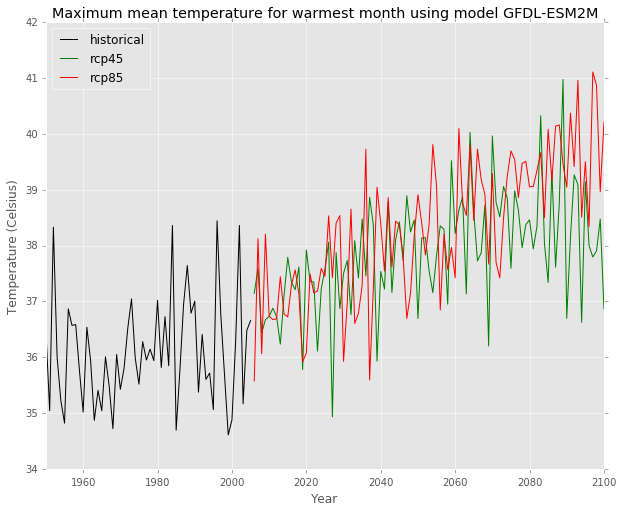

In [12]:
do_graph(data)